### Define your license plate file

In [6]:
#!pip3 install imutils

In [1]:
src="img/brrotate.png"

### FFT rectify main program

shape (256, 256, 3)
img (256, 256)
(256, 256)
(200, 128)
66
28.8


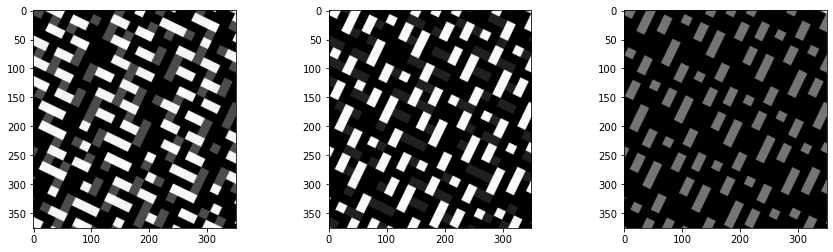

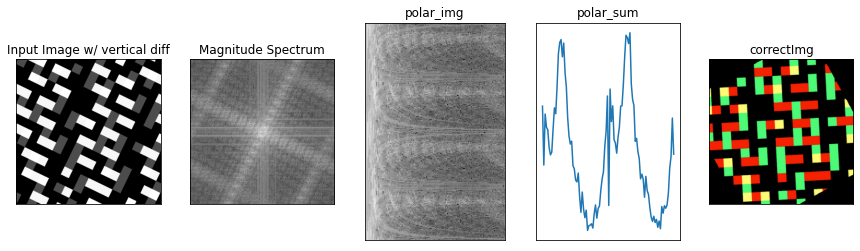

img (256, 256)
14
25.200000000000003


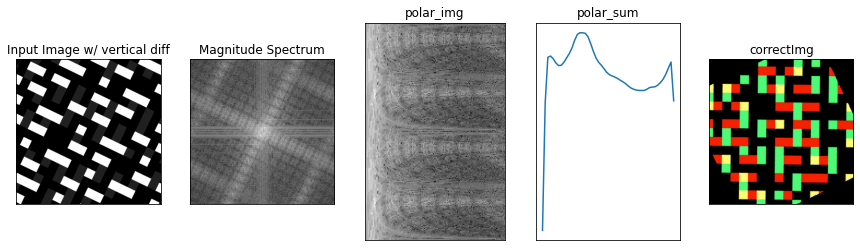

In [34]:
import os, sys
import numpy as np
import math
from matplotlib import pyplot as plt
import cv2
import time
import statistics
import imutils
from scipy import ndimage, misc

isPlot=True
isBias=False
coreCut=0.01
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])


def fftplot(imgPath):
    img = cv2.imread(imgPath)
    pix_color = np.array(img)
    img = rgb2gray(pix_color)
    #print(img.shape)
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(fshift))

    plt.subplot(121),plt.imshow(img, cmap = 'gray')
    plt.title('Input Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
    plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
    plt.show()


def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])


def imgWrapA(orgImg,a):
    print(a)
    img_a = ndimage.rotate(orgImg, a, reshape=False)
    
    return img_a

def estCorrect(orgImg0, cutoffF=1.0, margin=0.0):
    orgImg = orgImg0
    w=orgImg.shape[1]
    print('shape', orgImg.shape)
    crop_img = orgImg
    pix_color = np.array(crop_img)
    full_pix_color = np.array(orgImg)
    #img = rgb2gray(pix_color)
    img=pix_color[:,:,0]
    print('img', img.shape)
    #img=abs(img[0:-1,:]-img[1:,:])
    
    print(img.shape)
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(fshift))
        
    #plt.subplot(143),plt.imshow(np.abs(fshift), cmap = 'gray')
    #plt.title('np.abs(fshift)'), plt.xticks([]), plt.yticks([])
    margin = 1.0 # Cut off the outer 10% of the image
    # Do the polar rotation along 100 angular steps with a radius of 256 pixels.
    size=min(img.shape)
    polar_img = cv2.warpPolar(magnitude_spectrum, (int(size/2), 200), (img.shape[1]/2,img.shape[0]/2), 
                                  size*margin*0.5, cv2.WARP_POLAR_LINEAR)
    print(polar_img.shape)

    polar_img_lowF=polar_img[:,int(coreCut*polar_img.shape[1]):int(cutoffF*polar_img.shape[1])]
    
    polar_sum_200=np.sum(polar_img_lowF,axis=1)
    polar_sum_200_1=polar_sum_200
    polar_sum=polar_sum_200[0:100]+polar_sum_200[100:200]
    #polar_sum[50]=min(polar_sum) #matthew  do not count center line
    #print(statistics.stdev(polar_sum[25:75]))
    #gainStdev=statistics.stdev(polar_sum[25:75])/10000
    #if isBias:
    #    polar_sum[45:56]=(polar_sum[45:56]*GAIN*gainStdev+polar_sum[45:56]*(1-gainStdev))
    maxIndex=np.argmax(polar_sum[25:75])+25
    print(maxIndex)
    offsetDegree=(maxIndex-50)/100*180
    #aEst=np.sin(offsetDegree)
    #correctImg=imgWrapA(pix_color,aEst)
    full_pix_color0 = np.array(orgImg0)
    correctImg=imgWrapA(full_pix_color0,offsetDegree)
    #full_pix_color
    #polar_sum[25:75]=min(polar_sum) #matthew  do not count center line
    #maxIndex2=np.argmax(polar_sum)
    #print("maxIndex2={}".format(maxIndex2))
    
    if isPlot:
        plt.subplots(1,4,figsize=(15,4))
        plt.subplot(151),plt.imshow(img, cmap = 'gray')
        plt.title('Input Image w/ vertical diff'), plt.xticks([]), plt.yticks([])
        plt.subplot(152),plt.imshow(magnitude_spectrum, cmap = 'gray')
        plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
        plt.subplot(153),plt.imshow(polar_img, cmap = 'gray')
        plt.title('polar_img'), plt.xticks([]), plt.yticks([])
        plt.subplot(154),plt.plot(polar_sum)
        #print(polar_sum-min(polar_sum))
        plt.title('polar_sum'), plt.xticks([]), plt.yticks([])
        plt.subplot(155),plt.imshow(correctImg)
        plt.title('correctImg'), plt.xticks([]), plt.yticks([])
        plt.show()

    img=np.rot90(pix_color[:,:,1])
    print('img', img.shape)
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    margin = 1.0 # Cut off the outer 10% of the image
    size=min(img.shape)
    polar_img = cv2.warpPolar(magnitude_spectrum, (int(size/2), 200), (img.shape[1]/2,img.shape[0]/2), 
                                  size*margin*0.5, cv2.WARP_POLAR_LINEAR)
    polar_img_lowF=polar_img[:,int(coreCut*polar_img.shape[1]):int(cutoffF*polar_img.shape[1])]
    polar_sum_200=np.sum(polar_img_lowF,axis=1)
    polar_sum_200=polar_sum_200+polar_sum_200_1
    polar_sum=polar_sum_200[0:50]+polar_sum_200[100:150]+polar_sum_200[50:100]+polar_sum_200[150:200]
    polar_sum = np.convolve(polar_sum, [1,3,3,1], mode='same')
    maxIndex=np.argmax(polar_sum)
    print(maxIndex)
    offsetDegree=(maxIndex)/50*90
    full_pix_color0 = np.array(orgImg0)
    correctImg=imgWrapA(full_pix_color0,offsetDegree)
    if isPlot:
        plt.subplots(1,4,figsize=(15,4))
        plt.subplot(151),plt.imshow(img, cmap = 'gray')
        plt.title('Input Image w/ vertical diff'), plt.xticks([]), plt.yticks([])
        plt.subplot(152),plt.imshow(magnitude_spectrum, cmap = 'gray')
        plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
        plt.subplot(153),plt.imshow(polar_img, cmap = 'gray')
        plt.title('polar_img'), plt.xticks([]), plt.yticks([])
        plt.subplot(154),plt.plot(polar_sum)
        #print(polar_sum-min(polar_sum))
        plt.title('polar_sum'), plt.xticks([]), plt.yticks([])
        plt.subplot(155),plt.imshow(correctImg)
        plt.title('correctImg'), plt.xticks([]), plt.yticks([])
        plt.show()
    return correctImg


def estCorrect2D(orgImg, cutoffF=0.8, margin=0.1):
    hCorrectedImg=estCorrect(orgImg, cutoffF, margin)
    


def fftplotWarp(imgPath):
    orgImg = cv2.imread(imgPath)
    s=256
    pix_color = np.array(orgImg[0: s, 0:s])
    plt.subplots(1,3,figsize=(15,4))
    plt.subplot(131),plt.imshow(orgImg[:,:,0], cmap = 'gray')
    plt.subplot(132),plt.imshow(orgImg[:,:,1], cmap = 'gray')
    plt.subplot(133),plt.imshow(orgImg[:,:,2], cmap = 'gray')

    estCorrect2D(pix_color, 1.0, 0.1)

        
fftplotWarp(src)
